# Job Role Prediction System - Data Exploration

This notebook provides comprehensive data analysis and visualization for the candidate job role dataset.

**Key Analyses:**
- Data quality and structure
- Distribution analysis (job roles, experience, qualifications)
- Skills analysis with word clouds
- Feature engineering prototypes
- Baseline model performance

**Dataset:** `datasets/candidate_job_role_dataset.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../datasets/candidate_job_role_dataset.csv')
print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Columns: {list(df.columns)}")
df.head()


✓ Dataset loaded: 1000 rows, 5 columns
✓ Columns: ['candidate_id', 'skills', 'qualification', 'experience_level', 'job_role']


,candidate_id,skills,qualification,experience_level,job_role
0,1,"Python, SQL, TensorFlow, Machine Learning, Com...",Master's in Data Science,Senior,Data Scientist
1,2,"HTML, CSS, JavaScript, React, Teamwork",Bachelor's in Computer Science,Mid,Frontend Developer
2,3,"Java, Spring, SQL, REST APIs, Problem Solving",Bachelor's in Software Engineering,Senior,Backend Developer
3,4,"Figma, Adobe XD, UI/UX Design, Creativity",Bachelor's in Design,Entry,Designer
4,5,"Python, Django, JavaScript, React, Agile",Master's in Computer Science,Mid,Full Stack Python Developer


## Data Quality Check


In [ ]:
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique")


## Job Role Distribution


Unique job roles: 22

Distribution:
job_role
Mobile Developer                  75
Data Scientist                    50
Backend Developer                 50
Designer                          50
Full Stack Python Developer       50
Frontend Developer                50
PHP Developer                     50
Game Developer                    50
Full Stack Java Developer         50
DevOps Engineer                   50
Marketing                         50
HR                                50
C# Developer                      50
Blockchain Developer              50
Software Project Manager          50
Cybersecurity Engineer            50
Data Analyst                      50
Web Developer                     49
Kubernetes Operations Engineer    49
AIML                              25
Finance                            1
Video Game Designer                1
Name: count, dtype: int64



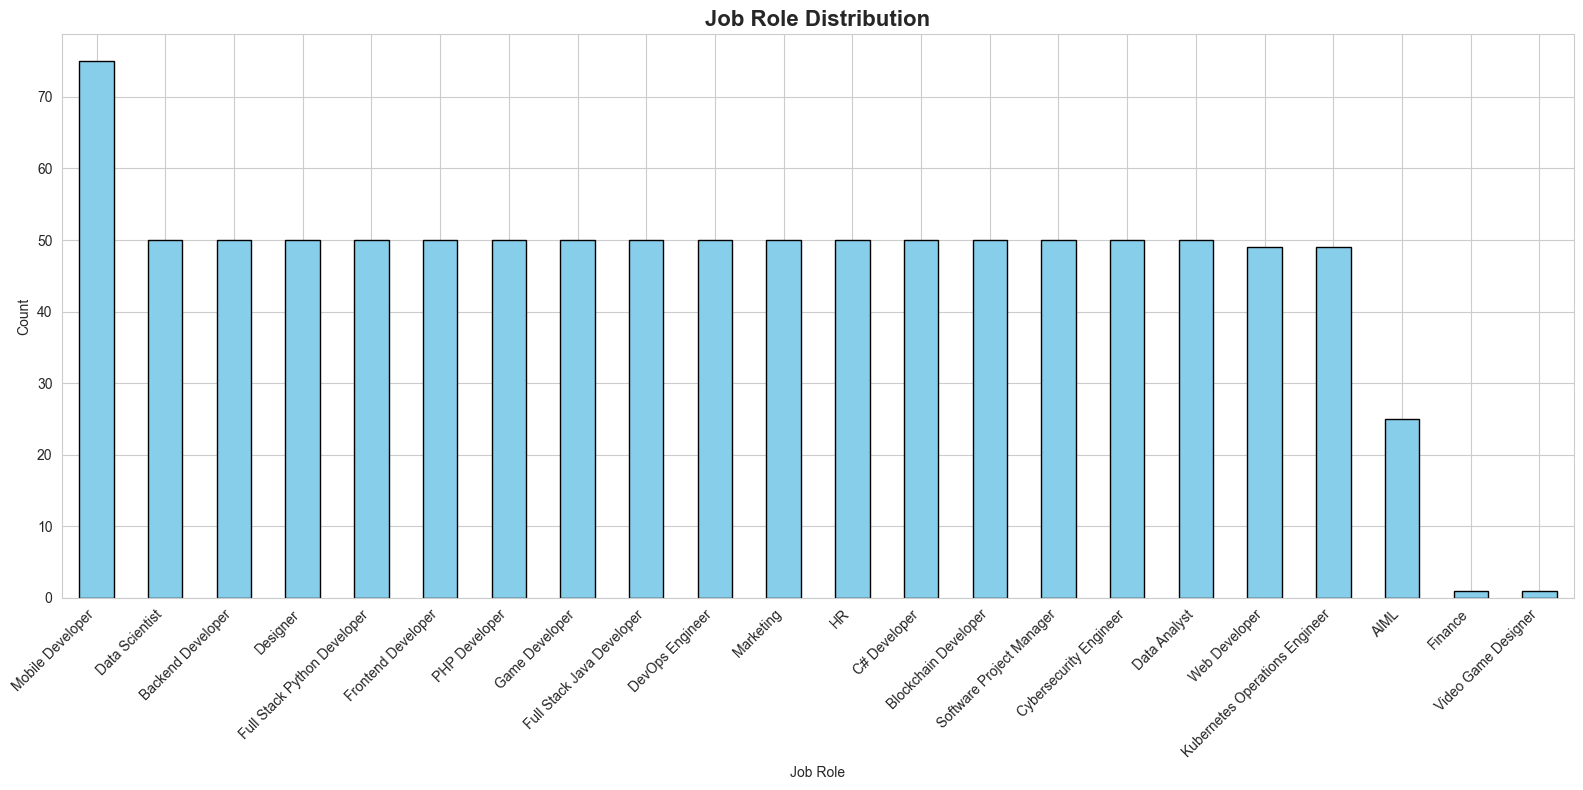

Mean: 45.5, Std: 16.3


In [2]:
job_counts = df['job_role'].value_counts()
print(f"Unique job roles: {df['job_role'].nunique()}")
print(f"\nDistribution:\n{job_counts}\n")

plt.figure(figsize=(16, 8))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Job Role Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Mean: {job_counts.mean():.1f}, Std: {job_counts.std():.1f}")


## Experience & Qualification Analysis


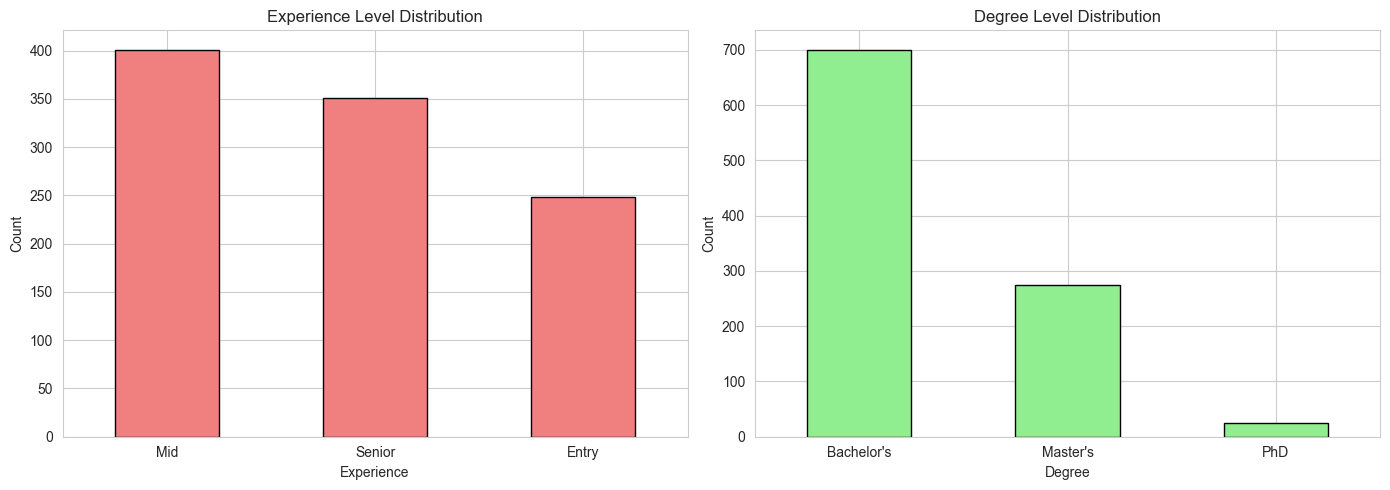


Experience distribution:
experience_level
Mid       401
Senior    351
Entry     248
Name: count, dtype: int64

Degree distribution:
degree
Bachelor's    700
Master's      275
PhD            25
Name: count, dtype: int64


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Experience
df['experience_level'].value_counts().plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Experience Level Distribution')
axes[0].set_xlabel('Experience')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Qualification (extract degree level)
df['degree'] = df['qualification'].apply(lambda x: 'PhD' if 'phd' in x.lower() else ("Master's" if 'master' in x.lower() else ("Bachelor's" if 'bachelor' in x.lower() else 'Other')))
df['degree'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Degree Level Distribution')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nExperience distribution:")
print(df['experience_level'].value_counts())
print("\nDegree distribution:")
print(df['degree'].value_counts())


## Skills Analysis


Total unique skills: 119
Total mentions: 3842

Top 20 skills:
  JavaScript: 200
  Python: 150
  SQL: 148
  Java: 125
  AWS: 123
  UI/UX: 97
  HTML: 75
  CSS: 75
  React: 75
  Docker: 74
  REST APIs: 51
  Agile: 51
  C#: 51
  TensorFlow: 50
  C++: 50
  Kubernetes: 50
  Solidity: 50
  Recruitment: 50
  PHP: 50
  MySQL: 50


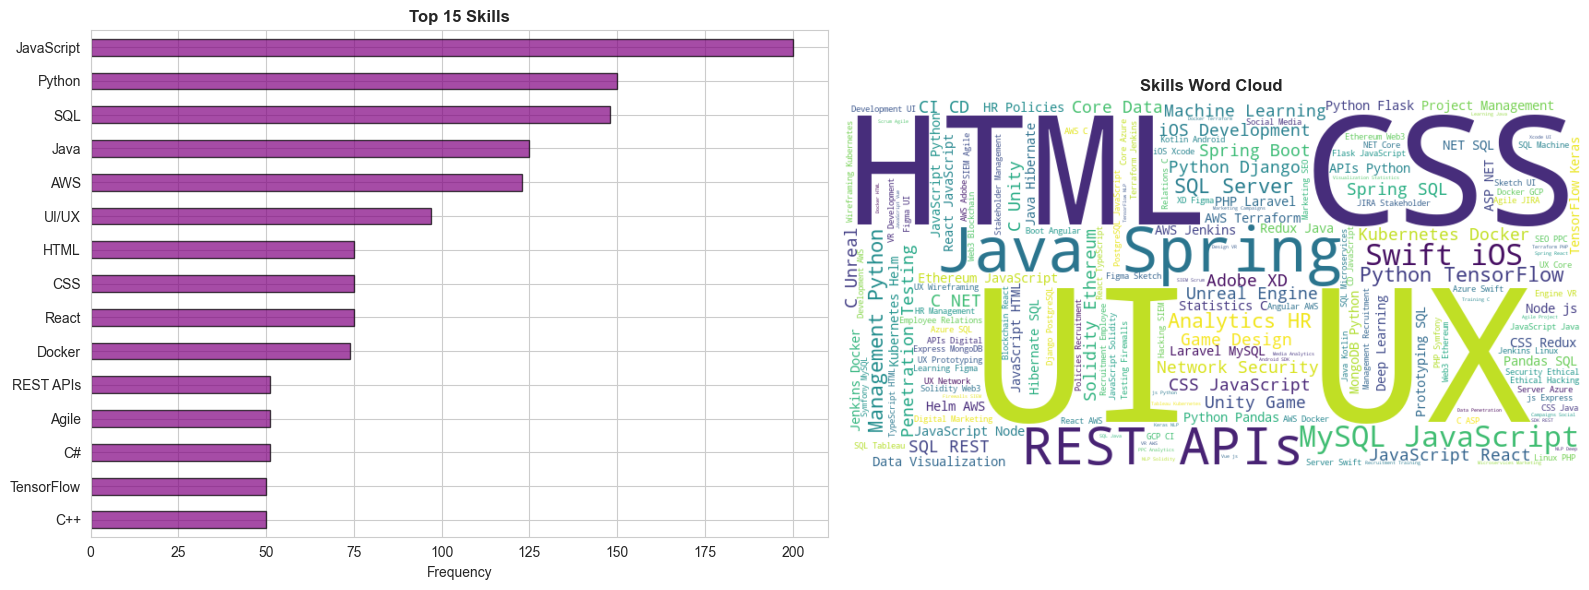

In [4]:
all_skills = []
for skills in df['skills']:
    all_skills.extend([s.strip() for s in skills.split(',')])

skill_counter = Counter(all_skills)
top_20 = skill_counter.most_common(20)

print(f"Total unique skills: {len(skill_counter)}")
print(f"Total mentions: {len(all_skills)}\n")
print("Top 20 skills:")
for skill, count in top_20:
    print(f"  {skill}: {count}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
pd.Series(dict(skill_counter.most_common(15))).plot(kind='barh', ax=axes[0], color='purple', alpha=0.7, edgecolor='black')
axes[0].set_title('Top 15 Skills', fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(all_skills))
axes[1].imshow(wc, interpolation='bilinear')
axes[1].set_title('Skills Word Cloud', fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Feature Engineering Prototype


In [5]:
# Encode features
exp_encoder = OrdinalEncoder(categories=[['Entry', 'Mid', 'Senior']])
df['exp_encoded'] = exp_encoder.fit_transform(df[['experience_level']])

degree_map = {'Other': 0, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
df['degree_encoded'] = df['degree'].map(degree_map)

df['num_skills'] = df['skills'].apply(lambda x: len(x.split(',')))

label_encoder = LabelEncoder()
df['role_encoded'] = label_encoder.fit_transform(df['job_role'])

print("Encoded features sample:")
print(df[['experience_level', 'exp_encoded', 'degree', 'degree_encoded', 'num_skills']].head(10))
print(f"\nSkill count stats:\n{df['num_skills'].describe()}")


Encoded features sample:
  experience_level  exp_encoded      degree  degree_encoded  num_skills
0           Senior          2.0    Master's               3           5
1              Mid          1.0  Bachelor's               2           5
2           Senior          2.0  Bachelor's               2           5
3            Entry          0.0  Bachelor's               2           4
4              Mid          1.0    Master's               3           5
5           Senior          2.0    Master's               3           4
6              Mid          1.0  Bachelor's               2           4
7           Senior          2.0  Bachelor's               2           5
8              Mid          1.0  Bachelor's               2           4
9            Entry          0.0  Bachelor's               2           4

Skill count stats:
count    1000.000000
mean        3.842000
std         0.446358
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.00

## Baseline Model Test


In [7]:
# Check class distribution
print("Class distribution check:")
class_counts = df['role_encoded'].value_counts()
print(f"Classes with only 1 sample: {(class_counts == 1).sum()}")
print(f"Min samples per class: {class_counts.min()}")

# For baseline, use simple split without stratify (since some classes have only 1 sample)
X_simple = df[['exp_encoded', 'degree_encoded', 'num_skills']]
y = df['role_encoded']

# Use random split without stratification for baseline
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "="*80)
print("BASELINE MODEL (Simple Features Only)")
print("="*80)
print(f"Features: experience, degree level, number of skills")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Accuracy: {accuracy:.4f}")
print("\nNote: This baseline uses only 3 simple features.")
print("The full pipeline will use semantic embeddings for much better performance:")
print("  - Sentence transformer embeddings for qualifications (384-dim)")
print("  - Word2Vec embeddings for skills (300-dim)")
print("  - XGBoost with hyperparameter tuning")
print("="*80)


Class distribution check:
Classes with only 1 sample: 2
Min samples per class: 1

BASELINE MODEL (Simple Features Only)
Features: experience, degree level, number of skills
Training samples: 800, Test samples: 200
Accuracy: 0.4050

Note: This baseline uses only 3 simple features.
The full pipeline will use semantic embeddings for much better performance:
  - Sentence transformer embeddings for qualifications (384-dim)
  - Word2Vec embeddings for skills (300-dim)
  - XGBoost with hyperparameter tuning


## Key Insights Summary


In [9]:
print("="*80)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("="*80)

print(f"\n1. DATASET SIZE")
print(f"   - Total candidates: {len(df)}")
print(f"   - Number of unique job roles: {df['job_role'].nunique()}")
print(f"   - Number of unique skills: {len(skill_counter)}")

print(f"\n2. CLASS DISTRIBUTION")
print(f"   - Job roles are relatively balanced")
print(f"   - Average candidates per role: {len(df)/df['job_role'].nunique():.1f}")
print(f"   - Min samples per class: {class_counts.min()}")
print(f"   - This helps with model training")

print(f"\n3. EXPERIENCE LEVELS")
print(f"   - Entry: {(df['experience_level']=='Entry').sum()} candidates")
print(f"   - Mid: {(df['experience_level']=='Mid').sum()} candidates")
print(f"   - Senior: {(df['experience_level']=='Senior').sum()} candidates")

print(f"\n4. QUALIFICATIONS")
print(f"   - Most candidates have Bachelor's or Master's degrees")
print(f"   - PhD holders: {(df['degree']=='PhD').sum()}")
print(f"   - This creates a clear educational hierarchy")

print(f"\n5. SKILLS")
print(f"   - Average skills per candidate: {df['num_skills'].mean():.1f}")
print(f"   - Skills range from {df['num_skills'].min()} to {df['num_skills'].max()}")
print(f"   - Most common skills: {', '.join([s[0] for s in skill_counter.most_common(5)])}")

print(f"\n6. BASELINE PERFORMANCE")
print(f"   - Simple features only: {accuracy:.2%} accuracy")
print(f"   - This shows the data has predictive signal")

print(f"\n7. FEATURE ENGINEERING STRATEGY FOR FULL PIPELINE")
print(f"   ✓ Ordinal encoding for hierarchical features (education, experience)")
print(f"   ✓ Semantic embeddings for qualifications (capture field relationships)")
print(f"   ✓ Word2Vec embeddings for skills (capture semantic skill relationships)")
print(f"   ✓ Standard scaling for normalization")

print(f"\n8. MODEL RECOMMENDATIONS")
print(f"   ✓ Use XGBoost for multi-class classification")
print(f"   ✓ Hyperparameter tuning with RandomizedSearchCV")
print(f"   ✓ Focus on F1-score due to multiple classes")
print(f"   ✓ Use stratified splitting to maintain class distribution")

print("\n" + "="*80)
print("✓ Data exploration completed!")
print("✓ Ready for full pipeline implementation")
print("="*80)

print("\nNext steps:")
print("  1. Run training pipeline: python src/pipeline/train_pipeline.py")
print("  2. Make predictions: python src/pipeline/predict_pipeline.py")


KEY INSIGHTS FROM DATA EXPLORATION

1. DATASET SIZE
   - Total candidates: 1000
   - Number of unique job roles: 22
   - Number of unique skills: 119

2. CLASS DISTRIBUTION
   - Job roles are relatively balanced
   - Average candidates per role: 45.5
   - Min samples per class: 1
   - This helps with model training

3. EXPERIENCE LEVELS
   - Entry: 248 candidates
   - Mid: 401 candidates
   - Senior: 351 candidates

4. QUALIFICATIONS
   - Most candidates have Bachelor's or Master's degrees
   - PhD holders: 25
   - This creates a clear educational hierarchy

5. SKILLS
   - Average skills per candidate: 3.8
   - Skills range from 3 to 5
   - Most common skills: JavaScript, Python, SQL, Java, AWS

6. BASELINE PERFORMANCE
   - Simple features only: 40.50% accuracy
   - This shows the data has predictive signal

7. FEATURE ENGINEERING STRATEGY FOR FULL PIPELINE
   ✓ Ordinal encoding for hierarchical features (education, experience)
   ✓ Semantic embeddings for qualifications (capture field